## PROJECT CODES// Miray Dogan // ##

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
os.chdir( "C:/Users/Administrator/Desktop/END-566E/archive")
os.getcwd()

'C:\\Users\\Administrator\\Desktop\\END-566E\\archive'

**Section-1: Business Understanding**

The aim is to develop a data-driven solution on the basis of minimizing loss rates and ultimately helping 
us increase customer satisfaction and corporate revenue.
Such kind of a service would help related business units to maximize their collection income and as 
well as minimize operational costs.
With this Project, we will able to analyze the IBM Telco Customer Churn data set. This data set currently 
available on the link which will be shown at the resources.
The data set is analyzed, manipulated, modelled and evaluated by applying methods.
Dependent (target) variable is binary {0,1} labeled as '1' contains the clients that decided to terminate 
their relations with the company and '0' includes the clients that did not leave the company last month


**Question-1: What is the demographic impact on churn rate?**

**Question-2: Which reasons are more effective in churn rate?**

**Question-3: Which is the best model?**

In [2]:

import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


**Section-2:Data Understanding**

In [5]:
data=pd.read_excel("Telco_customer_churn.xlsx")

In [6]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [7]:
df_telco=data.copy()

In [8]:
df_telco.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [9]:
# check unique values of each column
for column in df_telco.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_telco[column].unique()))

Column: CustomerID - Unique Values: ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Column: Count - Unique Values: [1]
Column: Country - Unique Values: ['United States']
Column: State - Unique Values: ['California']
Column: City - Unique Values: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Column: Zip Code - Unique Values: [90003 90005 90006 ... 96128 96134 96146]
Column: Lat Long - Unique Values: ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Column: Latitude - Unique Values: [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Column: Longitude - Unique Values: [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Column: Gender - Unique Values: ['Male' 'Female']
Column: Senior Citizen - Unique Values: ['No' 'Yes']
Column: Partner - Unique Values: ['No' 

In [9]:
# As we can see, customerID is unique so we can not use the this column for modeling or anything else
# because we are analyzing the overall data not a personal data.
# country and state are always same as United state and california. we can drop these colums.
# churn label == churn value so these features have high corelety we have drop churn label or churn value.
# we are dropping the churn value.

In [10]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [11]:
#we have 33 columns and 7043 rows
#zip code is integer but actually this column unique so we can turn this column to object. 
#however, we observe that the column **TotalCharges** was wrongly detected as an object. 
#This column represents the total amount charged to the customer and it is, therefore, a numeric variable.

In [12]:
# For further analysis, 
# we need to transform this column into a numeric data type. To do so, we can use the pd.to_numeric function. 
# By default, this function raises an exception when it sees non-numeric data; however, 
# we can use the argument errors='coerce' to skip those cases and replace them with a NaN.

In [14]:
# transform the column TotalCharges into a numeric data type
df_telco['Total Charges'] = pd.to_numeric(df_telco['Total Charges'], errors='coerce')

In [15]:
# null observations of the TotalCharges column
df_telco[df_telco['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,NaN,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,NaN,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,NaN,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,NaN,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,NaN,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,NaN,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,NaN,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,NaN,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,NaN,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,NaN,No,0,44,2342,NaN


In [17]:
#we observed that, there are 11 nan values, these customers did not pay anything, so churn label=no is normal.

df_telco['Total Charges'].dropna(inplace=True)

df_telco.info()

In [16]:
dff_telco = df_telco.dropna(subset=['Total Charges'])

In [17]:
dff_telco[dff_telco['Total Charges'].isnull()]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason


In [29]:
dff_telco2=dff_telco.copy()

In [30]:
dff_telco2.rename(columns = {'Zip Code':'Zip_Code'}, inplace = True)

In [31]:
dff_telco2['Zip_Code'] = pd.Categorical(dff_telco2.Zip_Code)

In [33]:
dff_telco2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         7032 non-null   object  
 1   Count              7032 non-null   int64   
 2   Country            7032 non-null   object  
 3   State              7032 non-null   object  
 4   City               7032 non-null   object  
 5   Zip_Code           7032 non-null   category
 6   Lat Long           7032 non-null   object  
 7   Latitude           7032 non-null   float64 
 8   Longitude          7032 non-null   float64 
 9   Gender             7032 non-null   object  
 10  Senior Citizen     7032 non-null   object  
 11  Partner            7032 non-null   object  
 12  Dependents         7032 non-null   object  
 13  Tenure Months      7032 non-null   int64   
 14  Phone Service      7032 non-null   object  
 15  Multiple Lines     7032 non-null   object  
 16  Intern

In [34]:
#The customerID column is useless to explain whether not the customer will churn. 
#Therefore, we drop this column from the data set.

In [35]:
# drop the customerID column from the dataset
dff_telco2.drop(columns='CustomerID', inplace=True)

In [36]:
# drop the country column from the dataset
dff_telco2.drop(columns='Country', inplace=True)
# drop the state column from the dataset
dff_telco2.drop(columns='State', inplace=True)
dff_telco2.drop(columns='Count', inplace=True)

In [37]:
dff_telco2.rename(columns = {'Payment Method':'Payment_Method'}, inplace = True)

In [38]:
# unique elements of the PaymentMethod column
dff_telco2.Payment_Method.unique()
# remove (automatic) from payment method names
dff_telco2['Payment_Method'] = dff_telco2['Payment_Method'].str.replace(' (automatic)', '', regex=False)
# unique elements of the PaymentMethod column after the modification 
dff_telco2.Payment_Method.unique()

array(['Mailed check', 'Electronic check', 'Bank transfer', 'Credit card'],
      dtype=object)

**Section-3: Data Visualiton**

In [39]:
dff_telco2.drop(columns='Churn Value', inplace=True)

In [40]:
# proportion of observation of each class
prop_response = dff_telco2['Churn Label'].value_counts(normalize=True)

In [43]:
dff_telco_count=dff_telco.groupby(['Churn Label']).count()[['CustomerID']].sort_values(by='CustomerID',ascending=False)

In [44]:
dff_telco_count.head()

,CustomerID
Churn Label,
No,5163
Yes,1869


In [45]:
dff_telco_count.reset_index(inplace=True)

In [46]:
dff_telco_count.head()

,Churn Label,CustomerID
0,No,5163
1,Yes,1869


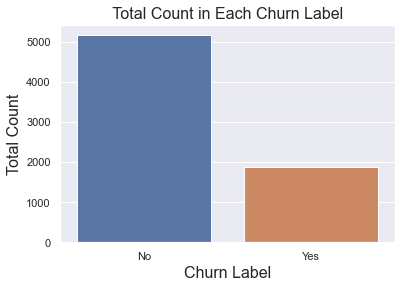

In [47]:
sns.set_theme(style="darkgrid")
sns.barplot(x="Churn Label", y="CustomerID",data=dff_telco_count)
plt.xlabel('Churn Label', fontsize=16)
plt.ylabel('Total Count', fontsize=16)
plt.title(" Total Count in Each Churn Label ",fontsize=16)
plt.show()

In [48]:
dff_telco2.head()

,City,Zip_Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,...,Streaming Movies,Contract,Paperless Billing,Payment_Method,Monthly Charges,Total Charges,Churn Label,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86,3239,Competitor made better offer
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67,2701,Moved
2,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,86,5372,Moved
3,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84,5003,Moved
4,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,...,Yes,Month-to-month,Yes,Bank transfer,103.70,5036.30,Yes,89,5340,Competitor had better devices


In [49]:
from math import *
import math

In [50]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(dff_telco2[column], dff_telco2['Churn Label']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

In [51]:
# we can together all data under five titles.

**Question-1: What is the demographic impact on churn rate**

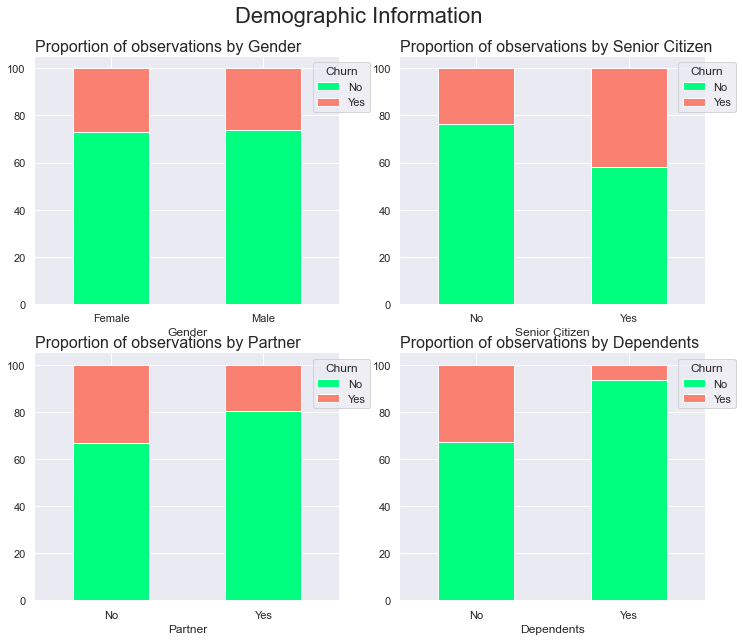

In [52]:
# demographic column names
demographic_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

Text(0.5, 1.0, 'The count label types according to Gender types')

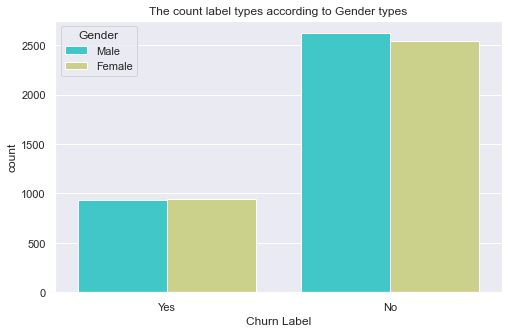

In [54]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Gender')
plt.title("The count label types according to Gender types")

Text(0.5, 1.0, 'The count label types according to Senior Citizen')

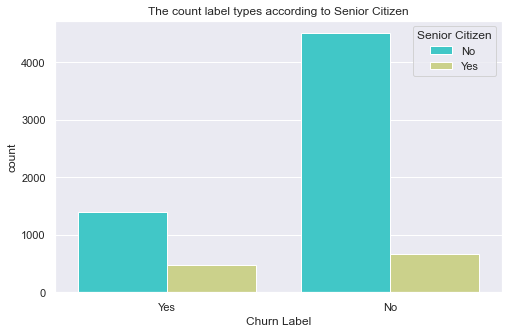

In [55]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Senior Citizen')
plt.title("The count label types according to Senior Citizen")

Text(0.5, 1.0, 'The count label types according to PArtner')

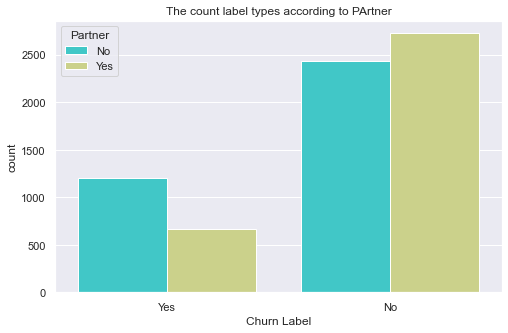

In [56]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Partner')
plt.title("The count label types according to PArtner")

Text(0.5, 1.0, 'The count label types according to Dependents')

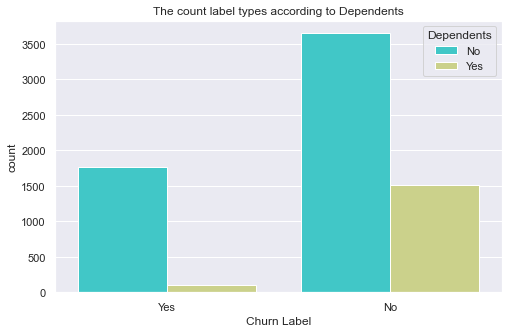

In [57]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Dependents')
plt.title("The count label types according to Dependents")

**Demographics**
CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time the fiscal quarter ended.

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Married: Indicates if the customer is married: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Number of Dependents: Indicates the number of dependents that live with the customer.

 

**Location**
CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

 

**Population**
ID: A unique ID that identifies each row.

Zip Code: The zip code of the customer’s primary residence.

Population: A current population estimate for the entire Zip Code area.

 

**Services**
CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Quarter: The fiscal quarter that the data has been derived from (e.g. Q3).

Referred a Friend: Indicates if the customer has ever referred a friend or family member to this company: Yes, No

Number of Referrals: Indicates the number of referrals to date that the customer has made.

Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Offer: Identifies the last marketing offer that the customer accepted, if applicable. Values include None, Offer A, Offer B, Offer C, Offer D, and Offer E.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Avg Monthly Long Distance Charges: Indicates the customer’s average long distance charges, calculated to the end of the quarter specified above.

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Avg Monthly GB Download: Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter specified above.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Music: Indicates if the customer uses their Internet service to stream music from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Unlimited Data: Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads: Yes, No

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Total Refunds: Indicates the customer’s total refunds, calculated to the end of the quarter specified above.

Total Extra Data Charges: Indicates the customer’s total charges for extra data downloads above those specified in their plan, by the end of the quarter specified above.

Total Long Distance Charges: Indicates the customer’s total charges for long distance above those specified in their plan, by the end of the quarter specified above.

 

**Status**
CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Quarter: The fiscal quarter that the data has been derived from (e.g. Q3).

Satisfaction Score: A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied).

Satisfaction Score Label: Indicates the text version of the score (1-5) as a text string.

Customer Status: Indicates the status of the customer at the end of the quarter: Churned, Stayed, or Joined

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

Churn Score Category: A calculation that assigns a Churn Score to one of the following categories: 0-10, 11-20, 21-30, 31-40, 41-50, 51-60, 61-70, 71-80, 81-90, and 91-100

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

CLTV Category: A calculation that assigns a CLTV value to one of the following categories: 2000-2500, 2501-3000, 3001-3500, 3501-4000, 4001-4500, 4501-5000, 5001-5500, 5501-6000, 6001-6500, and 6501-7000.

Churn Category: A high-level category for the customer’s reason for churning: Attitude, Competitor, Dissatisfaction, Other, Price. When they leave the company, all customers are asked about their reasons for leaving. Directly related to Churn Reason.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

In [66]:
dff_telco_count2=dff_telco.groupby(['Churn Label','City']).count()[['CustomerID']].sort_values(by='CustomerID',ascending=False)

In [68]:
pac_=dff_telco_count2

In [69]:
pac_.reset_index(inplace=True)
pac_.head()

,Churn Label,City,CustomerID
0,No,Los Angeles,214
1,No,San Diego,100
2,Yes,Los Angeles,90
3,No,San Jose,83
4,No,Sacramento,82


In [83]:
churn_no=pac_[pac_['Churn Label']=='No']

In [74]:
churn_yes=pac_[pac_['Churn Label']=='Yes']

In [80]:
churn_no3=churn_no.head(3)

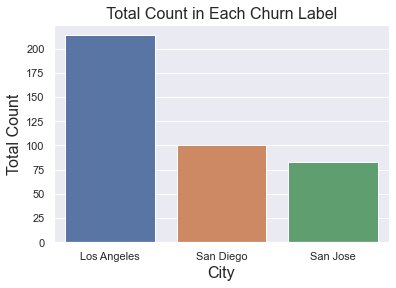

In [84]:
sns.set_theme(style="darkgrid")
sns.barplot(x="City", y="CustomerID",data=churn_no3)
plt.xlabel('City', fontsize=16)
plt.ylabel('Total Count', fontsize=16)
plt.title(" Total Count in Each Churn Label ",fontsize=16)
plt.show()

In [81]:
churn_yes3=churn_yes.head(3)

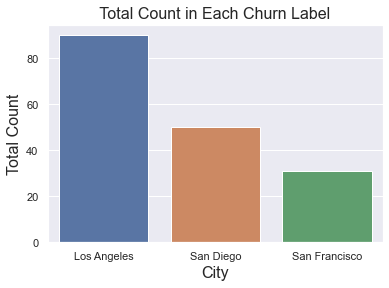

In [85]:
sns.set_theme(style="darkgrid")
sns.barplot(x="City", y="CustomerID",data=churn_yes3)
plt.xlabel('City', fontsize=16)
plt.ylabel('Total Count', fontsize=16)
plt.title(" Total Count in Each Churn Label ",fontsize=16)
plt.show()

Question-2: Which factors are effective in churn rate?

In [86]:
dff_telco_count3=dff_telco.groupby(['Churn Label','Churn Reason']).count()[['CustomerID']].sort_values(by='CustomerID',ascending=False)

In [87]:
pac2=dff_telco_count3

In [88]:
pac2.head()

CustomerID
Churn Label Churn Reason                                         
Yes         Attitude of support person                        192
            Competitor offered higher download speeds         189
            Competitor offered more data                      162
            Don't know                                        154
            Competitor made better offer                      140

In [89]:
pac2.reset_index(inplace=True)
pac2.head()

,Churn Label,Churn Reason,CustomerID
0,Yes,Attitude of support person,192
1,Yes,Competitor offered higher download speeds,189
2,Yes,Competitor offered more data,162
3,Yes,Don't know,154
4,Yes,Competitor made better offer,140


In [104]:
pac23=pac2.head(3)

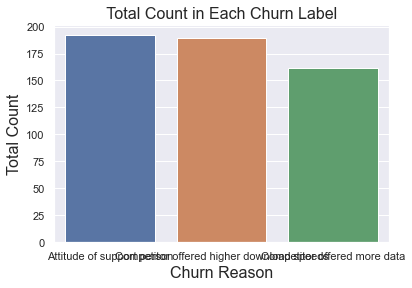

In [105]:
sns.set_theme(style="darkgrid")
sns.barplot(x="Churn Reason", y="CustomerID",data=pac23)
plt.xlabel('Churn Reason', fontsize=16)
plt.ylabel('Total Count', fontsize=16)
plt.title(" Total Count in Each Churn Label ",fontsize=16)
plt.show()

Attitude of support person	192
Competitor offered higher download speeds	189
Competitor offered more data	16

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

In [92]:
dff_telco_count4=dff_telco.groupby(['Churn Label','CLTV']).count()[['CustomerID']].sort_values(by='CLTV',ascending=False)

In [93]:
pac3=dff_telco_count4
pac3.reset_index(inplace=True)
pac3.head()

,Churn Label,CLTV,CustomerID
0,No,6500,1
1,No,6499,2
2,No,6495,1
3,No,6494,2
4,No,6492,3


In [94]:
dff_telco_count5=dff_telco.groupby(['Churn Label','CLTV']).count()[['CustomerID']].sort_values(by='CustomerID',ascending=False)

In [96]:
pac4=dff_telco_count5
pac4.reset_index(inplace=True)
pac4.head(10)

,index,Churn Label,CLTV,CustomerID
0,0,No,5092,7
1,1,No,5461,6
2,2,No,5096,6
3,3,No,2269,6
4,4,No,4556,6
5,5,No,5137,6
6,6,No,4883,5
7,7,No,5756,5
8,8,No,4093,5
9,9,No,4858,5


No: şirketten ayrılmamış müşteri

6500	1
6499	2
6495 olanlara dikkat edilmelidir.

In [113]:
churn_no3=pac4[pac4['Churn Label']=='No']

In [98]:
churn_yes3=pac4[pac4['Churn Label']=='Yes']

In [114]:
churn_no3=churn_no3.head()

In [115]:
churn_no3

,index,Churn Label,CLTV,CustomerID
0,0,No,5092,7
1,1,No,5461,6
2,2,No,5096,6
3,3,No,2269,6
4,4,No,4556,6


In [110]:
churn_yes3=churn_yes3.head()

In [112]:
churn_yes3

,index,Churn Label,CLTV,CustomerID
87,87,Yes,3520,4
170,170,Yes,4287,4
187,187,Yes,3878,3
210,210,Yes,2933,3
213,213,Yes,3677,3


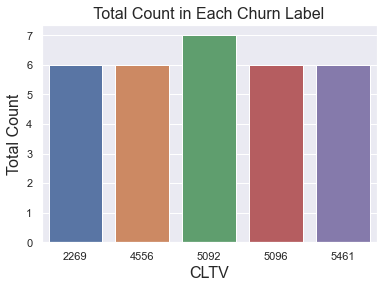

In [116]:
sns.set_theme(style="darkgrid")
sns.barplot(x="CLTV", y="CustomerID",data=churn_no3)
plt.xlabel('CLTV', fontsize=16)
plt.ylabel('Total Count', fontsize=16)
plt.title(" Total Count in Each Churn Label ",fontsize=16)
plt.show()

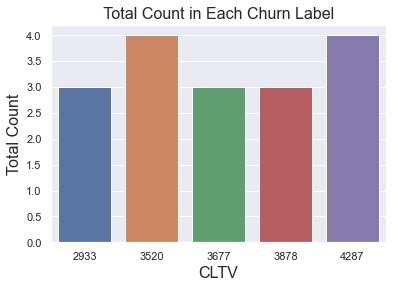

In [117]:
sns.set_theme(style="darkgrid")
sns.barplot(x="CLTV", y="CustomerID",data=churn_yes3)
plt.xlabel('CLTV', fontsize=16)
plt.ylabel('Total Count', fontsize=16)
plt.title(" Total Count in Each Churn Label ",fontsize=16)
plt.show()

In [118]:
#Services

Text(0.5, 1.0, 'The count label types according to Payment Method')

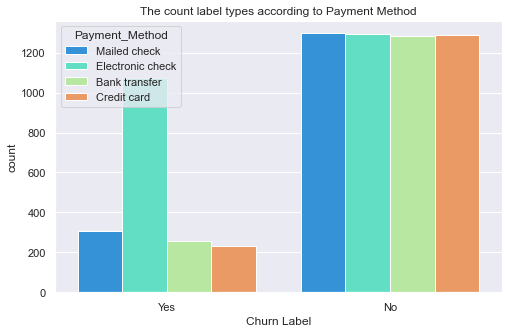

In [121]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Payment_Method')
plt.title("The count label types according to Payment Method")

Text(0.5, 1.0, 'The count label types according to Internet Service')

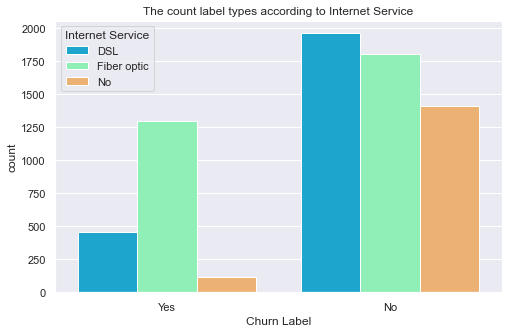

In [122]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Internet Service')
plt.title("The count label types according to Internet Service")

Text(0.5, 1.0, 'The count label types according to Tech Support')

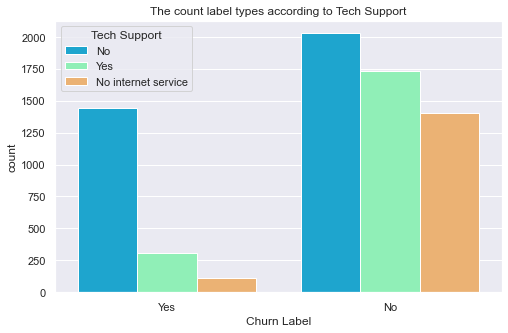

In [125]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Tech Support')
plt.title("The count label types according to Tech Support")

In [124]:
dff_telco2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               7032 non-null   object  
 1   Zip_Code           7032 non-null   category
 2   Lat Long           7032 non-null   object  
 3   Latitude           7032 non-null   float64 
 4   Longitude          7032 non-null   float64 
 5   Gender             7032 non-null   object  
 6   Senior Citizen     7032 non-null   object  
 7   Partner            7032 non-null   object  
 8   Dependents         7032 non-null   object  
 9   Tenure Months      7032 non-null   int64   
 10  Phone Service      7032 non-null   object  
 11  Multiple Lines     7032 non-null   object  
 12  Internet Service   7032 non-null   object  
 13  Online Security    7032 non-null   object  
 14  Online Backup      7032 non-null   object  
 15  Device Protection  7032 non-null   object  
 16  Tech S

Text(0.5, 1.0, 'The count label types according to Contract')

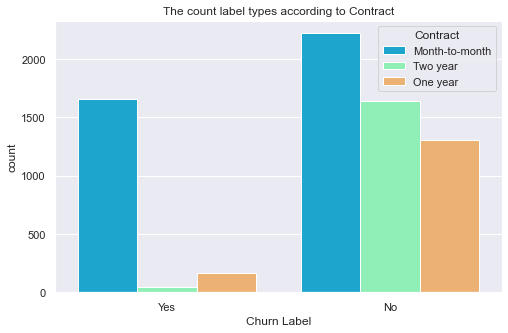

In [126]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Contract')
plt.title("The count label types according to Contract")

Text(0.5, 1.0, 'The count label types according to Paperless Billing')

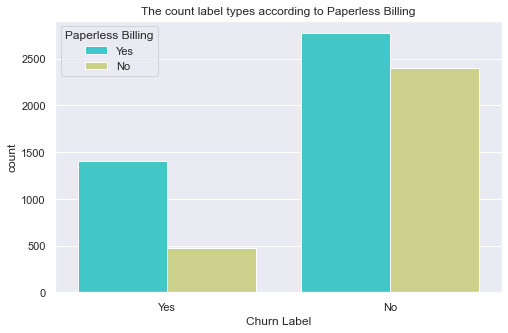

In [127]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Paperless Billing')
plt.title("The count label types according to Paperless Billing")

Text(0.5, 1.0, 'The count label types according to Multiple Lines')

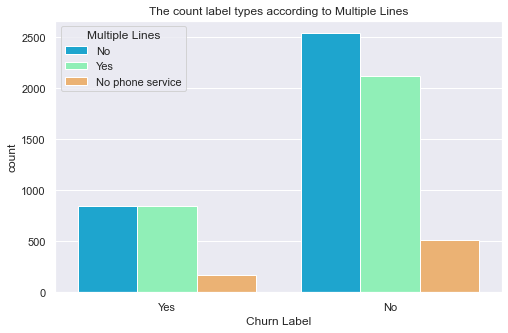

In [128]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn Label',data=dff_telco2, palette='rainbow',hue='Multiple Lines')
plt.title("The count label types according to Multiple Lines")

In [ ]:
#Analyzing

In [129]:
dff_telco2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               7032 non-null   object  
 1   Zip_Code           7032 non-null   category
 2   Lat Long           7032 non-null   object  
 3   Latitude           7032 non-null   float64 
 4   Longitude          7032 non-null   float64 
 5   Gender             7032 non-null   object  
 6   Senior Citizen     7032 non-null   object  
 7   Partner            7032 non-null   object  
 8   Dependents         7032 non-null   object  
 9   Tenure Months      7032 non-null   int64   
 10  Phone Service      7032 non-null   object  
 11  Multiple Lines     7032 non-null   object  
 12  Internet Service   7032 non-null   object  
 13  Online Security    7032 non-null   object  
 14  Online Backup      7032 non-null   object  
 15  Device Protection  7032 non-null   object  
 16  Tech S

In [ ]:
#numerical values

Text(0.5, 1.0, '# of Customers by their tenure')

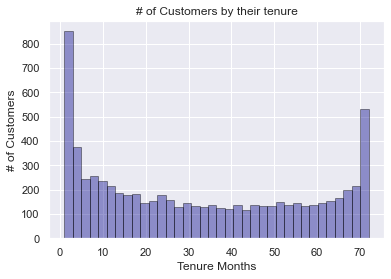

In [144]:
ax = sns.distplot(dff_telco2['Tenure Months'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Count of Customers')
ax.set_xlabel('Tenure Months')
ax.set_title('Count of Customers by their tenure')

Text(0.5, 1.0, 'Count of Customers by their monthly charges')

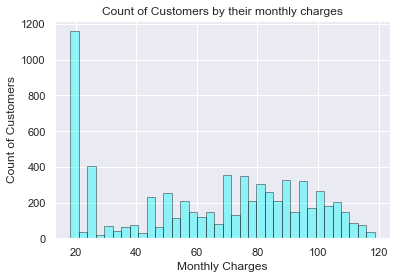

In [147]:
             
ax = sns.distplot(dff_telco2['Monthly Charges'], hist=True, kde=False, 
             bins=int(180/5), color = 'cyan', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Count of Customers')
ax.set_xlabel('Monthly Charges')
ax.set_title('Count of Customers by their monthly charges')

Text(0.5, 1.0, 'Count of Customers by their total charges')

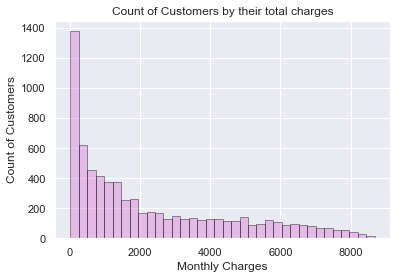

In [146]:
ax = sns.distplot(dff_telco2['Total Charges'], hist=True, kde=False, 
             bins=int(180/5), color = 'orchid', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Count of Customers')
ax.set_xlabel('Monthly Charges')
ax.set_title('Count of Customers by their total charges')

In [148]:
dff_telco2.rename(columns = {'Monthly Charges':'Monthly_Charges'}, inplace = True)

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

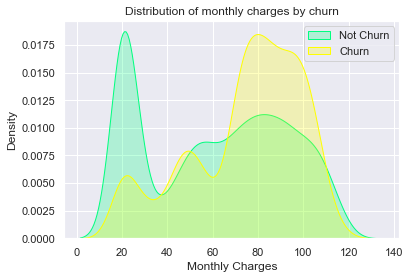

In [154]:
ax = sns.kdeplot(dff_telco2.Monthly_Charges[(dff_telco2["Churn Label"] == 'No') ],
                color="Springgreen", shade = True)
ax = sns.kdeplot(dff_telco2.Monthly_Charges[(dff_telco2["Churn Label"] == 'Yes') ],
                ax =ax, color="Yellow", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [151]:
dff_telco2.rename(columns = {'Total Charges':'Total_Charges'}, inplace = True)

Text(0.5, 1.0, 'Distribution of total charges by churn')

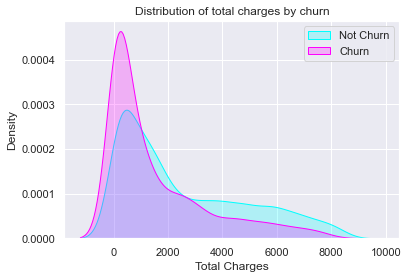

In [153]:
ax = sns.kdeplot(dff_telco2.Total_Charges[(dff_telco2["Churn Label"] == 'No') ],
                color="Cyan", shade = True)
ax = sns.kdeplot(dff_telco2.Total_Charges[(dff_telco2["Churn Label"] == 'Yes') ],
                ax =ax, color="Magenta", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

In [155]:
dff_telco2.rename(columns = {'Tenure Months':'Tenure_Months'}, inplace = True)

Text(0.5, 1.0, 'Distribution of tenure months by churn')

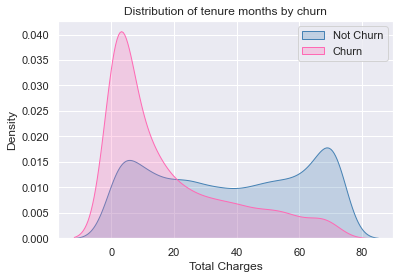

In [156]:
ax = sns.kdeplot(dff_telco2.Tenure_Months[(dff_telco2["Churn Label"] == 'No') ],
                color="Steelblue", shade = True)
ax = sns.kdeplot(dff_telco2.Tenure_Months[(dff_telco2["Churn Label"] == 'Yes') ],
                ax =ax, color="Hotpink", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of tenure months by churn')

In [157]:
dff_telco2.rename(columns = {'Churn Label':'Churn'}, inplace = True)

In [159]:
#Feature Importance

In [162]:
 from sklearn.metrics.cluster import mutual_info_score

In [169]:
dff_telco3=dff_telco2.copy()

In [170]:
dff_telco3['Churn Reason'] = dff_telco3['Churn Reason'].fillna('a')

In [171]:
dff_telco3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               7032 non-null   object  
 1   Zip_Code           7032 non-null   category
 2   Lat Long           7032 non-null   object  
 3   Latitude           7032 non-null   float64 
 4   Longitude          7032 non-null   float64 
 5   Gender             7032 non-null   object  
 6   Senior Citizen     7032 non-null   object  
 7   Partner            7032 non-null   object  
 8   Dependents         7032 non-null   object  
 9   Tenure_Months      7032 non-null   int64   
 10  Phone Service      7032 non-null   object  
 11  Multiple Lines     7032 non-null   object  
 12  Internet Service   7032 non-null   object  
 13  Online Security    7032 non-null   object  
 14  Online Backup      7032 non-null   object  
 15  Device Protection  7032 non-null   object  
 16  Tech S

In [172]:
# function that computes the mutual infomation score between a categorical serie and the column Churn
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, dff_telco3.Churn)

# select categorial variables excluding the response variable 
categorical_variables = dff_telco3.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Churn Reason         0.579021
Lat Long             0.150900
City                 0.105419
Contract             0.098182
Online Security      0.064528
Tech Support         0.062873
Internet Service     0.055394
Online Backup        0.046659
Payment_Method       0.044423
Device Protection    0.043784
Dependents           0.037613
Streaming Movies     0.031918
Streaming TV         0.031803
Paperless Billing    0.019119
Partner              0.011383
Senior Citizen       0.010533
Multiple Lines       0.000798
Phone Service        0.000069
Gender               0.000037
dtype: float64


In [173]:
  dff_telco3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               7032 non-null   object  
 1   Zip_Code           7032 non-null   category
 2   Lat Long           7032 non-null   object  
 3   Latitude           7032 non-null   float64 
 4   Longitude          7032 non-null   float64 
 5   Gender             7032 non-null   object  
 6   Senior Citizen     7032 non-null   object  
 7   Partner            7032 non-null   object  
 8   Dependents         7032 non-null   object  
 9   Tenure_Months      7032 non-null   int64   
 10  Phone Service      7032 non-null   object  
 11  Multiple Lines     7032 non-null   object  
 12  Internet Service   7032 non-null   object  
 13  Online Security    7032 non-null   object  
 14  Online Backup      7032 non-null   object  
 15  Device Protection  7032 non-null   object  
 16  Tech S

#churn reason is direclty related with churn. It is normal, because if there is a churn, there is a churn reason. 
so will drop churn reason.
And latitute and longtitute is realy high corele attrribute. So we will drop this column longitude

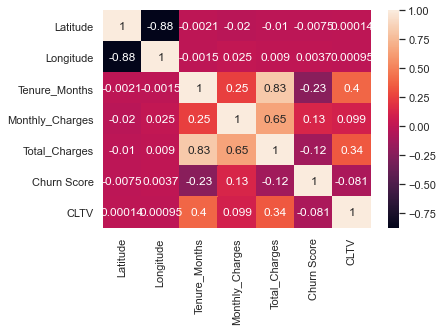

In [174]:
corrMatrix = dff_telco3.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [175]:
dff_telco3.drop(columns='Churn Reason', inplace=True)
dff_telco3.drop(columns='Latitude', inplace=True)
dff_telco3.drop(columns='Longitude', inplace=True)

In [176]:
dff_telco3.head()

,City,Zip_Code,Lat Long,Gender,Senior Citizen,Partner,Dependents,Tenure_Months,Phone Service,Multiple Lines,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn,Churn Score,CLTV
0,Los Angeles,90003,"33.964131, -118.272783",Male,No,No,No,2,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,86,3239
1,Los Angeles,90005,"34.059281, -118.30742",Female,No,No,Yes,2,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,67,2701
2,Los Angeles,90006,"34.048013, -118.293953",Female,No,No,Yes,8,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,86,5372
3,Los Angeles,90010,"34.062125, -118.315709",Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,84,5003
4,Los Angeles,90015,"34.039224, -118.266293",Male,No,No,Yes,49,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer,103.70,5036.30,Yes,89,5340


In [177]:
dff_telco3.drop(columns='Lat Long', inplace=True)

In [178]:
dff_telco3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               7032 non-null   object  
 1   Zip_Code           7032 non-null   category
 2   Gender             7032 non-null   object  
 3   Senior Citizen     7032 non-null   object  
 4   Partner            7032 non-null   object  
 5   Dependents         7032 non-null   object  
 6   Tenure_Months      7032 non-null   int64   
 7   Phone Service      7032 non-null   object  
 8   Multiple Lines     7032 non-null   object  
 9   Internet Service   7032 non-null   object  
 10  Online Security    7032 non-null   object  
 11  Online Backup      7032 non-null   object  
 12  Device Protection  7032 non-null   object  
 13  Tech Support       7032 non-null   object  
 14  Streaming TV       7032 non-null   object  
 15  Streaming Movies   7032 non-null   object  
 16  Contra

**Section-3:Data Preparation**

Label Encoding
Label encoding is used to replace categorical values with numerical values. 
This encoding replaces every category with a numerical label. 
In this project, we use label encoding with the following binary variables:
(1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, (5)PhoneService , and (6)Churn .

In [192]:
# check unique values of each column
for column in dff_telco3.columns:
    print('Column: {} - Unique Values: {}'.format(column, dff_telco3[column].unique()))

Column: City - Unique Values: ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Tulelake'
 'Olympic Valley' 'Redcrest']
Column: Zip_Code - Unique Values: [90003, 90005, 90006, 90010, 90015, ..., 96124, 96128, 96134, 96146, 95569]
Length: 1652
Categories (1652, int64): [90003, 90005, 90006, 90010, ..., 96128, 96134, 96146, 95569]
Column: Gender - Unique Values: ['Male' 'Female']
Column: Senior Citizen - Unique Values: ['No' 'Yes']
Column: Partner - Unique Values: ['No' 'Yes']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: Tenure_Months - Unique Values: [ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 59 16 52 24 32 38 54 43 63 21 69 22 61 60 48 40 23 39 35
 56 65 33 30 45 46 62 70 50 44 71 26 14 41 66 64 29 42 67 51 31 57 36 72]
Column: Phone Service - Unique Values: ['Yes' 'No']
Column: Multiple Lines - Unique Values: ['No' 'Yes' 'No phone service']
Column: Internet Service - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: Online 

In [193]:
#Label Encoding

In [194]:
df_telco_transformed = dff_telco3.copy()

# label encoding (binary variables)
label_encoding_columns = ['Gender', 'Partner', 'Dependents', 'Paperless Billing', 'Phone Service', 'Churn','Senior Citizen']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'Gender':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes': 1, 'No': 0}) 

In [195]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 
                            'Tech Support', 'Streaming Movies', 'Contract', 'Payment_Method','City','Zip_Code','Streaming TV']

# encode categorical variables with more than two levels using one-hot encoding
df_telco_transformed = pd.get_dummies(df_telco_transformed, columns = one_hot_encoding_columns)

In [196]:
# min-max normalization (numeric variables)
min_max_columns = ['Tenure_Months', 'Monthly_Charges', 'Total_Charges','Churn Score','CLTV']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_telco_transformed[column].min()
        # maximum value of the column
        max_column = df_telco_transformed[column].max()
        # min max scaler
        df_telco_transformed[column] = (df_telco_transformed[column] - min_column) / (max_column - min_column)   


In [197]:
df_model=df_telco_transformed.copy()

In [198]:
df_model.tail()

,Gender,Senior Citizen,Partner,Dependents,Tenure_Months,Phone Service,Paperless Billing,Monthly_Charges,Total_Charges,Churn,...,Zip_Code_96142,Zip_Code_96143,Zip_Code_96145,Zip_Code_96146,Zip_Code_96148,Zip_Code_96150,Zip_Code_96161,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes
7038,1,0,0,0,1.000000,1,1,0.028856,0.161620,0,...,0,0,0,0,0,0,0,0,1,0
7039,0,0,1,1,0.323944,1,1,0.662189,0.227521,0,...,0,0,0,0,0,0,0,0,0,1
7040,1,0,1,1,1.000000,1,1,0.845274,0.847461,0,...,0,0,0,0,0,0,0,0,0,1
7041,1,0,1,1,0.140845,0,1,0.112935,0.037809,0,...,0,0,0,0,0,0,0,1,0,0
7042,0,0,0,0,0.915493,1,1,0.869652,0.787641,0,...,0,0,0,0,0,0,0,0,0,1


**Section-4: Modelling**

In [199]:
# select independent variables
X = df_model.drop(columns='Churn')

# select dependent variables
y = df_model.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone Service', 'Paperless Billing', 'Monthly_Charges',
       'Total_Charges', 'Churn Score',
       ...
       'Zip_Code_96142', 'Zip_Code_96143', 'Zip_Code_96145', 'Zip_Code_96146',
       'Zip_Code_96148', 'Zip_Code_96150', 'Zip_Code_96161', 'Streaming TV_No',
       'Streaming TV_No internet service', 'Streaming TV_Yes'],
      dtype='object', length=2823)
Churn


In [200]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=40, shuffle=True)

In [203]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 2823), (1407, 2823), (5625,), (1407,))

In [204]:
df_model["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

**Logistic Regression**

In [205]:
from sklearn.linear_model import LogisticRegression
loj=LogisticRegression(solver="liblinear")
loj_model=loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [206]:
y_pred=loj_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[986,  59],
       [ 46, 316]], dtype=int64)

In [207]:
accuracy_score(y_test,y_pred)

0.9253731343283582

In [208]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1045
           1       0.84      0.87      0.86       362

    accuracy                           0.93      1407
   macro avg       0.90      0.91      0.90      1407
weighted avg       0.93      0.93      0.93      1407



In [209]:
cross_val_score(loj_model,X_test,y_test, cv=10).mean()

0.9075886524822694

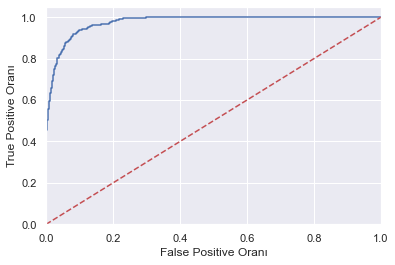

In [211]:
logit_roc_auc= roc_auc_score(y_test,loj_model.predict(X_test))
fpr, tpr, thresholds= roc_curve(y_test, loj_model.predict_proba(X_test)[:,1]) #verideki y=1 olan gözlemlerin % kaçına ulaştığımızı göstermektedir.
plt.figure()
plt.plot(fpr, tpr, label= 'AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.show()

In [210]:
loj_model.predict_proba(X)[0:10][:,0:2] #probabilities 
#0.50'lık threshold değerine göre karar vermiştir.


array([[0.11670875, 0.88329125],
       [0.60041155, 0.39958845],
       [0.09068376, 0.90931624],
       [0.14539317, 0.85460683],
       [0.33456361, 0.66543639],
       [0.39242595, 0.60757405],
       [0.00451215, 0.99548785],
       [0.10555566, 0.89444434],
       [0.38991368, 0.61008632],
       [0.01425868, 0.98574132]])

In [201]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


**CART ALGORITHM**

In [212]:
cart=DecisionTreeClassifier()
cart_model=cart.fit(X_train,y_train)

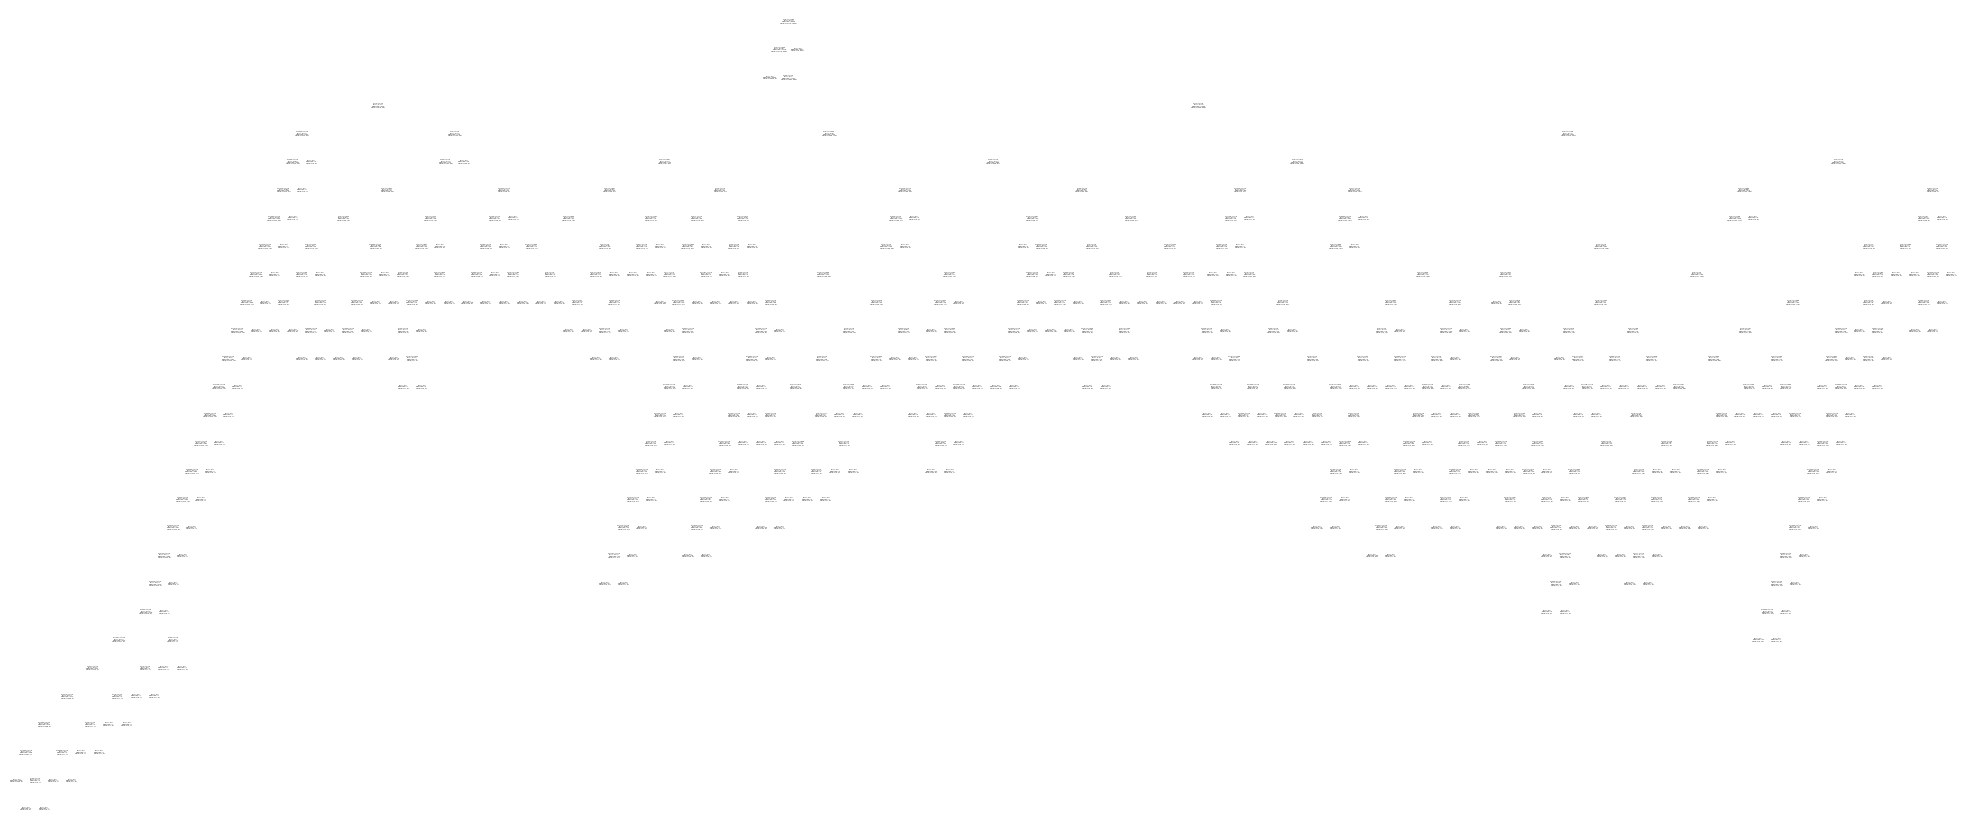

In [213]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_model);

In [214]:
y_pred=cart_model.predict(X_test)
print("Test seti accurAcy:", accuracy_score(y_test,y_pred))
print( classification_report(y_test,y_pred))

Test seti accurAcy: 0.9189765458422174
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1045
           1       0.84      0.85      0.84       362

    accuracy                           0.92      1407
   macro avg       0.89      0.90      0.89      1407
weighted avg       0.92      0.92      0.92      1407



In [215]:
cart_grid={"max_depth": range(1,16),
          "min_samples_split" : list(range(10,20))}

In [216]:
cart=tree.DecisionTreeClassifier()
cart_cv=GridSearchCV(cart, cart_grid, cv=10, n_jobs= -1, verbose=2)
cart_cv_model= cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.7min finished


In [217]:
print("En iyi parametre değerleri:" +str(cart_cv_model.best_params_))

En iyi parametre değerleri:{'max_depth': 6, 'min_samples_split': 16}


In [218]:
cart=tree.DecisionTreeClassifier(max_depth=6, min_samples_split=16)
cart_tuned= cart.fit(X_train,y_train)

Question_3: What is the best model?

In [219]:
y_pred=cart_tuned.predict(X_test)
print("Tuning sonrası test accuracy score", accuracy_score(y_test,y_pred)) 
print( classification_report(y_test,y_pred))#tuning ile yükseldi

Tuning sonrası test accuracy score 0.9303482587064676
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1045
           1       0.85      0.88      0.87       362

    accuracy                           0.93      1407
   macro avg       0.91      0.92      0.91      1407
weighted avg       0.93      0.93      0.93      1407



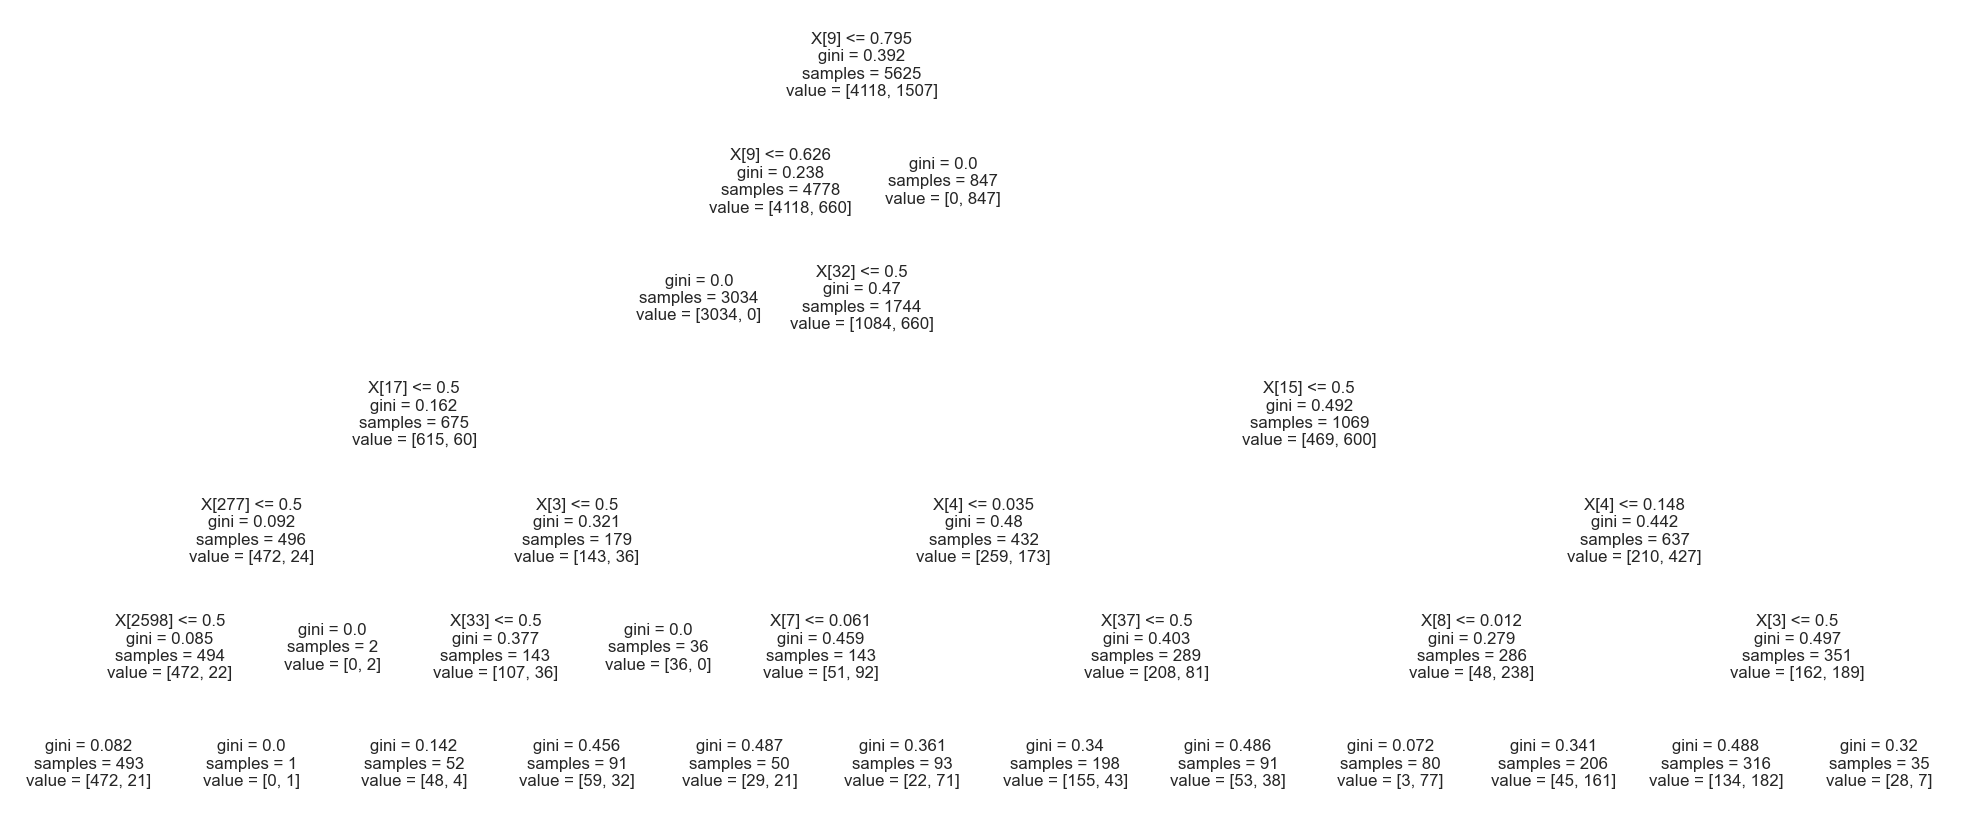

In [220]:
plt.figure(figsize=(35,15))
tree.plot_tree(cart_tuned);

**Random Forest Algorithm**

In [222]:
rf=RandomForestClassifier(random_state=42)
rf_model=rf.fit(X_train,y_train)

In [223]:
y_pred3=rf_model.predict(X_test)
print("Test Seti Random Forest Accuracy Score:", accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3),"Test veri seti için :")

Test Seti Random Forest Accuracy Score: 0.9118692253020612
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1045
           1       0.88      0.76      0.82       362

    accuracy                           0.91      1407
   macro avg       0.90      0.86      0.88      1407
weighted avg       0.91      0.91      0.91      1407
 Test veri seti için :


In [224]:
rf_params={"max_depth": list(range(5,10)),
        "max_features": [2,5,25],
        "n_estimators": [10,20,50]}
rf_model = RandomForestRegressor(random_state=42)

rf_tuned = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_tuned.fit(X_train, y_train)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  1.2min finished


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9],
                         'max_features': [2, 5, 25],
                         'n_estimators': [10, 20, 50]},
             verbose=2)

In [225]:
print("Random Forest en iyi parametre değerleri:",rf_tuned.best_params_)

Random Forest en iyi parametre değerleri: {'max_depth': 9, 'max_features': 25, 'n_estimators': 50}


In [226]:
rf_tuned=RandomForestClassifier(max_depth=9, max_features=25, n_estimators=50)
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, max_features=25, n_estimators=50)

In [227]:
y_pred=rf_tuned.predict(X_test)
print("Random Forest Tuning Sonrası Accuracy Değeri:", accuracy_score(y_test,y_pred))
print( classification_report(y_test,y_pred),"Test_tuned veri seti için")

Random Forest Tuning Sonrası Accuracy Değeri: 0.7619047619047619
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1045
           1       1.00      0.07      0.14       362

    accuracy                           0.76      1407
   macro avg       0.88      0.54      0.50      1407
weighted avg       0.82      0.76      0.68      1407
 Test_tuned veri seti için


In [228]:
#neural network algoritm#

In [229]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes=(100,20)).fit(X_train, y_train)
mlp_model

MLPClassifier(hidden_layer_sizes=(100, 20))

In [230]:
y_pred_m=mlp_model.predict(X_test)
print("Yapay Sinir Ağı Accuracy Değeri:", accuracy_score(y_test,y_pred_m))

Yapay Sinir Ağı Accuracy Değeri: 0.8734896943852167


In [231]:
print(classification_report(y_test,y_pred_m))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1045
           1       0.77      0.73      0.75       362

    accuracy                           0.87      1407
   macro avg       0.84      0.83      0.83      1407
weighted avg       0.87      0.87      0.87      1407



In [232]:
mlp_param = {"alpha": [0.1,0.01,0.02],
             "hidden_layer_sizes": [(100,50,150), (300,200,150)],
             "activation": ["relu","logistic"]}

mlp_cv_model = GridSearchCV(mlp_model, mlp_param, cv=10, n_jobs=-1, verbose=2)
mlp_cv_model.fit(X_train, y_train)

mlp_cv_model.best_params_

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 23.8min


KeyboardInterrupt: 

In [233]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [234]:
y_pred=knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.8152096659559346

In [235]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1045
           1       0.64      0.65      0.65       362

    accuracy                           0.82      1407
   macro avg       0.76      0.76      0.76      1407
weighted avg       0.82      0.82      0.82      1407



In [239]:
knn_params={"n_neighbors":np.arange(1,10)}
knn=KNeighborsClassifier()
knn_tuned=GridSearchCV(knn,knn_params,cv=10)
knn_tuned.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [240]:
print("En iyi parametreler:" + str(knn_tuned.best_params_))

En iyi parametreler:{'n_neighbors': 9}


In [244]:
knn=KNeighborsClassifier(9)
knn_tuned=knn.fit(X_train,y_train)
y_pred=knn_tuned.predict(X_test)
accuracy_score(y_test,y_pred)

0.8315565031982942

In [245]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      1045
           1       0.67      0.68      0.68       362

    accuracy                           0.83      1407
   macro avg       0.78      0.78      0.78      1407
weighted avg       0.83      0.83      0.83      1407



In [236]:
svm_model=SVC(kernel="linear").fit(X_train,y_train)

In [237]:
y_pred=svm_model.predict(X_test)

In [238]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1045
           1       0.81      0.85      0.83       362

    accuracy                           0.91      1407
   macro avg       0.88      0.89      0.89      1407
weighted avg       0.91      0.91      0.91      1407



In [246]:
svc_params={"C":np.arange(1,5)}
svc=SVC(kernel="linear")
svc_tuned=GridSearchCV(svc,svc_params,
                         cv=10,n_jobs=-1,
                         verbose=2)
svc_tuned.fit(X_train,y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.3min finished


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4])}, verbose=2)

In [247]:
print("En iyi parametreler:" + str(svc_tuned.best_params_))

En iyi parametreler:{'C': 4}


In [249]:
svc_tuned=SVC(C=4,kernel="linear").fit(X_train,y_train)

In [250]:
y_pred=svc_tuned.predict(X_test)

In [251]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1045
           1       0.81      0.85      0.83       362

    accuracy                           0.91      1407
   macro avg       0.88      0.89      0.88      1407
weighted avg       0.91      0.91      0.91      1407



**Naive bayes**

In [241]:
from sklearn.naive_bayes import GaussianNB

In [242]:
nb=GaussianNB()
nb_model=nb.fit(X_train,y_train)
nb_model

GaussianNB()

In [ ]:
y_pred=nb_model.predict(X_test)

In [243]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1045
           1       0.81      0.85      0.83       362

    accuracy                           0.91      1407
   macro avg       0.88      0.89      0.89      1407
weighted avg       0.91      0.91      0.91      1407



**Boosting**

In [252]:
from xgboost import XGBClassifier

In [253]:
xg_model=XGBClassifier().fit(X_train,y_train)

In [254]:
y_pred=xg_model.predict(X_test)

In [255]:
print(classification_report(y_test,y_pred),"Test veri seti için")

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1045
           1       0.84      0.86      0.85       362

    accuracy                           0.92      1407
   macro avg       0.90      0.90      0.90      1407
weighted avg       0.92      0.92      0.92      1407
 Test veri seti için


In [256]:
xgb_params={"learning_rate": [0.001,0.01,0.1,0.2],
           "n_estimators":[500,1000],
           "max_depth":[5,10],
           "min_child_weight":[0.8,0.9]}
xgb=XGBClassifier()

xgb_cv_model=GridSearchCV(xgb,xgb_params,cv=10,n_jobs=-1,verbose=2)
xgb_cv_model.fit(X_train,y_train)


Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
print("En iyi parametreler:" + str(xgb_cv_model.best_params_))

In [ ]:
modeller=[
    
    rf_model,
    svc_tuned,
    cat_tuned,
    *lgb_tuned,
    xgb_tuned,
    *gb_tuned,
    *bnb_model,
    knn_tuned,
]
for model in modeller:
    isimler=model.__class__.__name__
    y_pred=model.predict(X_test)
    dogruluk=accuracy_score(y_test,y_pred)
    print("-"*28)
    print(isimler +":")
    print("Accuracy: {:.4%}".format(dogruluk))

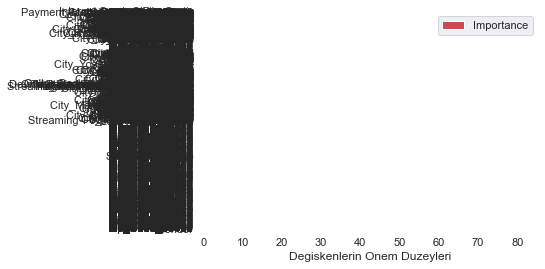

In [257]:
importance = pd.DataFrame({"Importance": cart_tuned.feature_importances_*100},
                          index=X_train.columns)
importance.sort_values(by="Importance", axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel("Degiskenlerin Onem Duzeyleri")
plt.show()

In [258]:
go = list(importance.sort_values(by= "Importance", axis=0,ascending=False)[0:10].T.columns)

In [259]:
go

['Churn Score',
 'Contract_Month-to-month',
 'Tenure_Months',
 'Internet Service_Fiber optic',
 'Dependents',
 'Monthly_Charges',
 'Online Security_No',
 'Payment_Method_Electronic check',
 'Contract_One year',
 'Total_Charges']

**Section-5:Evaluate the results**

**Question-1: What is the demographic impact on churn rate?**

<< Gender is not a distinguishing factor on churn label
<< Being senior citizen is a distinguishing factor on churn label. If the citizen is older, 
the churn rate is high than young citizen.
<< Being with a partner is critical part of churn rate. If there is no partner, the churn 
rate will be increasing
<< Customers with a dependecy churn less than customers with no partner
<< Los Angeles, San Diego and San Francisco are more prone to churn rate than the 
other cities




**Question-2**:Which reasons are more effective in churn rate?

we observed that there are 3 common churn reason. These are;
Attitude of support person= 192 
Competitor offered higher download speeds=189 
Competitor offered more data=16

**Question-3**:Which is the best model?

Regarding the result, best algorithm is cart algorithm with 0.93 accuracy